In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text.latex', preamble=r'\usepackage{mathptmx}')

In [37]:
a0 = -45
a1 = 0 
b0 = -22.5 
b1 = 22.5

angles = [
    (a0, b0),
    (a0 + 90, b0 + 90),
    (a0 + 90, b0),
    (a0, b0 + 90),
    (a0, b1),
    (a0 + 90, b1 + 90),
    (a0 + 90, b1),
    (a0, b1 + 90),
    (a1, b0),
    (a1 + 90, b0 + 90),
    (a1 + 90, b0),
    (a1, b0 + 90),
    (a1, b1),
    (a1 + 90, b1 + 90),
    (a1 + 90, b1),
    (a1, b1 + 90),
]


In [38]:
def counts(X, th, ph, A, C): 
    a, b = X
    
    # Degrees -> radians
    alpha  = np.pi * a / 180 
    beta   = np.pi * b / 180
    thetal = np.pi * th / 180
    phim   = np.pi * ph / 180

    res = A * (
            np.power(np.sin(alpha) * np.sin(beta) * np.cos(thetal), 2)
            + np.power(np.cos(alpha) * np.cos(beta) * np.sin(thetal), 2)
            + (1/4) * np.sin(2 * alpha) * np.sin(2 * beta) * np.sin(2 * thetal) * np.cos(phim)
        ) + C

    return res.flatten()


In [39]:
s = []
phis = np.linspace(0, 360, 50)
thetas = np.arange(45, 180, 45)

for th in thetas:
    s_th = []
    for ph in phis:

        n = {} 
        for ang in angles: 
            n[ang] = counts(ang, th, ph, 1, 0)

        def E(alpha, beta): 
            a_b, ap_b, a_bp, ap_bp = [n[(alpha, beta)], n[(alpha + 90, beta)], n[(alpha, beta + 90)], n[(alpha + 90, beta + 90)]]
            return (a_b + ap_bp - a_bp - ap_b) / (a_b + ap_bp + a_bp + ap_b)

        S = E(a0, b0) - E(a0, b1) + E(a1, b0) + E(a1, b1)
        s_th.append(S[0])
    s.append(s_th)
s = np.array(s).T
s

array([[2.82842712, 1.41421356, 0.        ],
       [2.81681645, 1.41421356, 0.01161067],
       [2.78217508, 1.41421356, 0.04625205],
       [2.72507181, 1.41421356, 0.10335531],
       [2.64644429, 1.41421356, 0.18198283],
       [2.54758358, 1.41421356, 0.28084355],
       [2.43011296, 1.41421356, 0.39831417],
       [2.2959613 , 1.41421356, 0.53246583],
       [2.14733136, 1.41421356, 0.68109576],
       [1.98666366, 1.41421356, 0.84176347],
       [1.81659633, 1.41421356, 1.01183079],
       [1.6399219 , 1.41421356, 1.18850523],
       [1.45954134, 1.41421356, 1.36888579],
       [1.2784165 , 1.41421356, 1.55001063],
       [1.09952144, 1.41421356, 1.72890569],
       [0.92579362, 1.41421356, 1.90263351],
       [0.76008564, 1.41421356, 2.06834149],
       [0.60511842, 1.41421356, 2.2233087 ],
       [0.46343653, 1.41421356, 2.3649906 ],
       [0.33736636, 1.41421356, 2.49106076],
       [0.228978  , 1.41421356, 2.59944913],
       [0.14005117, 1.41421356, 2.68837595],
       [0.

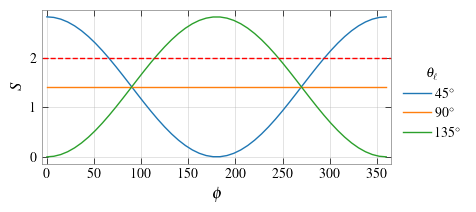

In [40]:
fig, ax = plt.subplots(figsize=(4.5,2)) 
ax.plot(phis, s, label=[f'${th}^\\circ$' for th in thetas])
ax.plot(np.linspace(-20,400,2), 2*np.ones(2), color='red', linestyle='dashed')
ax.set_xlim(-5, 365)
ax.legend(bbox_to_anchor=(1, 0.7), title='$\\theta_\\ell$')
ax.set_xlabel('$\\phi$')
ax.set_ylabel('$S$')
plt.savefig('./fig/s_theory.pdf')